In [1]:
import torch,os
from torch import nn 
from matplotlib import pyplot as plt 
%matplotlib inline
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset
from PIL import Image as im 
from tqdm.notebook import tqdm
import numpy as np 

In [2]:
imgname=[]
classes=os.listdir('dataset')

for Class in classes:
    for image in tqdm(os.listdir(f'dataset/{Class}/')):
        imgname.append(f'{Class}/{image}')
imgname

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

['0/0 (1).png',
 '0/0 (10).png',
 '0/0 (11).png',
 '0/0 (12).png',
 '0/0 (2).png',
 '0/0 (3).png',
 '0/0 (4).png',
 '0/0 (5).png',
 '0/0 (6).png',
 '0/0 (7).png',
 '0/0 (8).png',
 '0/0 (9).png',
 '1/14.png',
 '1/23.png',
 '1/24.png',
 '1/3.png',
 '1/40.png',
 '1/59.png',
 '1/6.png',
 '1/67.png',
 '1/70.png',
 '1/72.png',
 '1/77.png',
 '1/8.png']

In [3]:
class dset(Dataset):
    def __init__(self,names=imgname):
        self.names = names
        self.transform = transforms.Compose([transforms.PILToTensor()])
        
    def __len__(self):
        return len(self.names)

    def __getitem__(self, index):
        image = im.open(f'dataset/{imgname[index]}')
        label = int(imgname[index].split('/')[0])

        tensor = self.transform(image)
        tensor = tensor.squeeze()
        feature1 = torch.sum(tensor)/784
        feature2 = torch.sum(tensor-tensor.T)/784
        x = torch.tensor([feature1,feature2])#feature vec

        return x,torch.tensor([label])
      

In [4]:
data = dset(imgname)
len(data)

24

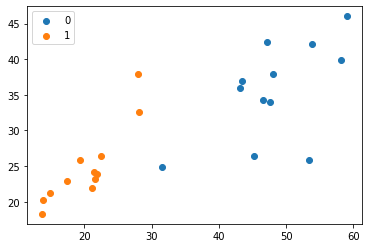

In [5]:
f1_0 = []
f2_0 = []
f1_1=[]
f2_1=[]
for i in range(len(data)):
    x,y = data[i]
    if y.item()==0:
        f1_0.append(x[0].detach().item())
        f2_0.append(x[1].detach().item())
    else:
        f1_1.append(x[0].detach().item())
        f2_1.append(x[1].detach().item())
    
    # print(x,y)
plt.scatter(f1_0,f2_0,label='0')
plt.scatter(f1_1,f2_1,label='1')
plt.legend()

In [6]:
class perceptron(nn.Module):
    def __init__(self) -> None:
        super(perceptron,self).__init__()
        self.linear = nn.Linear(2,1)
    
    def forward(self,x):
        return torch.sigmoid(self.linear(x))

In [7]:
model = perceptron()
loss = nn.MSELoss() # (x1-x2)^2
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

In [8]:
def trian(Epochs):
    losses=[]
    for e in range(Epochs):
        tloss = 0
        for i in range(len(data)):
            x,y = data[i]
            # print(x.shape,y.shape)
            yhat = model(x)
            loss_ = loss(y.float(),yhat.float())
            loss_.backward()
            optimizer.step()
            tloss+=loss_ 
            optimizer.zero_grad()
        if e%10 == 0:
            print(f'Epoch {e+1} {tloss}')
        losses.append(tloss.item())
    return losses
    


In [9]:
w,b = model.parameters()
w,b

(Parameter containing:
 tensor([[-0.3585, -0.0390]], requires_grad=True),
 Parameter containing:
 tensor([0.2415], requires_grad=True))

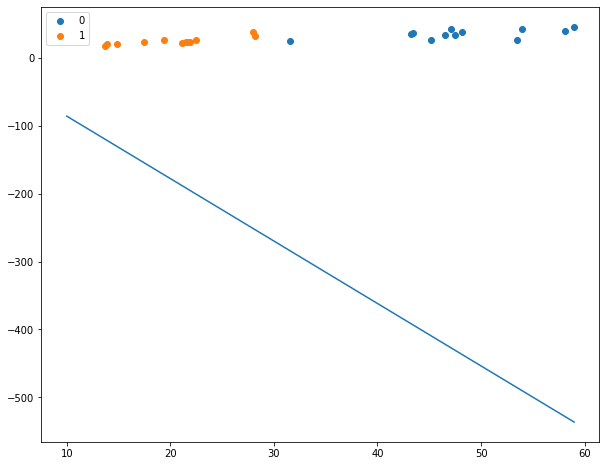

In [10]:
w=w.squeeze()
w1 = [w[0].detach().item(),w[1].detach().item()]
b1 = b.detach().item()

fig = plt.figure(figsize=(10, 8))

x = [10,max(f1_0)]
y1 = -(w1[0]*x[0]/w1[1])-(b1/w1[1])

y2 = -(w1[0]*x[1]/w1[1])-(b1/w1[1])
plt.scatter(f1_0,f2_0,label='0')
plt.scatter(f1_1,f2_1,label='1')
plt.plot(x,[y1,y2])
plt.legend()

In [11]:
EPOCHS=200
l = trian(EPOCHS)

Epoch 1 11.970381736755371
Epoch 11 1.31247878074646
Epoch 21 1.1251760721206665
Epoch 31 1.1947810649871826
Epoch 41 1.2802278995513916
Epoch 51 0.8045961856842041
Epoch 61 1.4603948593139648
Epoch 71 0.08227154612541199
Epoch 81 0.2858419418334961
Epoch 91 0.40016135573387146
Epoch 101 0.08574486523866653
Epoch 111 0.07353123277425766
Epoch 121 0.06548050791025162
Epoch 131 0.05947599932551384
Epoch 141 0.05474100261926651
Epoch 151 0.050867561250925064
Epoch 161 0.047616634517908096
Epoch 171 0.044833701103925705
Epoch 181 0.04241558164358139
Epoch 191 0.04028797894716263


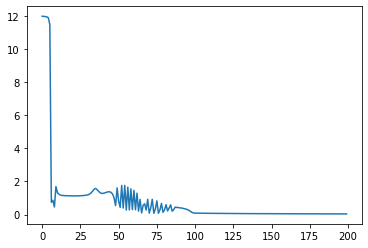

In [12]:
plt.plot(range(EPOCHS),l)

In [13]:
w,b=model.parameters()
w,b

(Parameter containing:
 tensor([[-0.9593,  1.0054]], requires_grad=True),
 Parameter containing:
 tensor([0.4501], requires_grad=True))

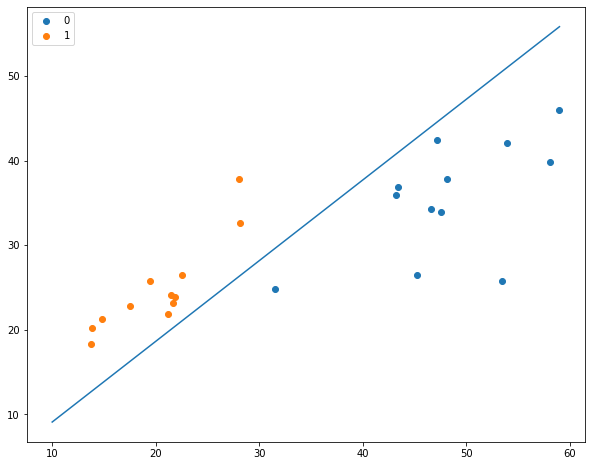

In [14]:
w=w.squeeze()
w1 = [w[0].detach().item(),w[1].detach().item()]
b1 = b.detach().item()

fig = plt.figure(figsize=(10, 8))

x = [10,max(f1_0)]
y1 = -(w1[0]*x[0]/w1[1])-(b1/w1[1])

y2 = -(w1[0]*x[1]/w1[1])-(b1/w1[1])
plt.scatter(f1_0,f2_0,label='0')
plt.scatter(f1_1,f2_1,label='1')
plt.plot(x,[y1,y2])
plt.legend()

***

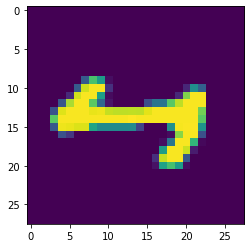

In [15]:
image = im.open(f'dataset/1/70.png')
# image = im.open(f'dataset/0/0 (4).png')
# label = int(imgname[index].split('/')[0])
tt = transforms.Compose([transforms.PILToTensor()])
tensor = tt(image)
tensor = tensor.squeeze()
feature1 = torch.sum(tensor)/784
feature2 = torch.sum(tensor-tensor.T)/784
x = torch.tensor([feature1,feature2])
plt.imshow(tensor.T.numpy())

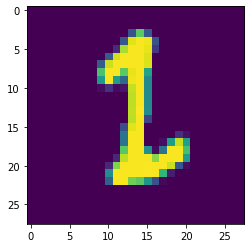

In [16]:
# image = im.open(f'dataset/0/0 (1).png')
plt.imshow(image)

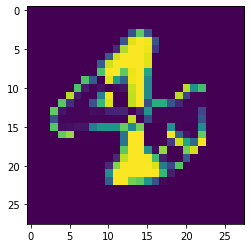

In [17]:
plt.imshow((tensor-tensor.T).numpy())

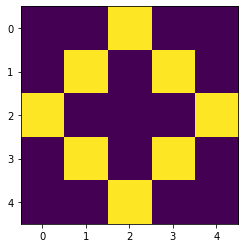

In [19]:
im2 =np.array(
    [
    [0,0,1,0,0],
    [0,1,0,1,0],
    [1,0,0,0,1],
    [0,1,0,1,0],
    [0,0,1,0,0]]
)
plt.imshow(im2)

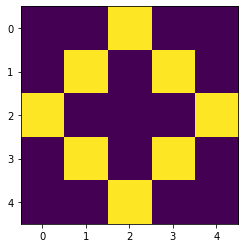

In [22]:
plt.imshow(im2.T)

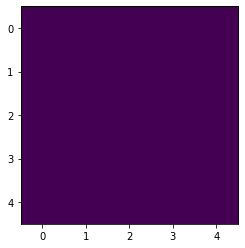

In [21]:
plt.imshow(im2-im2.T)